In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import acquire
import wrangle

In [2]:
df = acquire.get_zillow_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    52441 non-null  int64  
 1   parcelid                      52441 non-null  int64  
 2   bedroomcnt                    52441 non-null  float64
 3   bathroomcnt                   52441 non-null  float64
 4   calculatedfinishedsquarefeet  52359 non-null  float64
 5   taxvaluedollarcnt             52440 non-null  float64
 6   yearbuilt                     52325 non-null  float64
 7   taxamount                     52437 non-null  float64
 8   fips                          52441 non-null  float64
 9   assessmentyear                52441 non-null  float64
 10  landtaxvaluedollarcnt         52440 non-null  float64
 11  lotsizesquarefeet             52072 non-null  float64
 12  latitude                      52441 non-null  float64
 13  l

In [4]:
df = wrangle.wrangle_zillow(df)

In [5]:
df = wrangle.wrangle_locs(df)

In [6]:
zips = acquire.get_zillow_zips()

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [8]:
import sklearn.preprocessing

In [9]:
zips = zips.dropna()

In [10]:
zips.zips.value_counts()

91011         2923
92584         1383
92585         1052
90805          954
92555          935
              ... 
93030-6506       3
90815            3
90704            2
93560            2
92560            1
Name: zips, Length: 102, dtype: int64

In [11]:
#zips['b1'] = (zips['bedrooms'] + zips['bathrooms']) / 2

In [12]:
zips['zips'] = zips['zips'].apply(lambda x: str(x[:5]))

In [13]:
zips['zips'] = zips.zips.astype(int)

In [14]:
zip_counts = zips['zips'].value_counts()

zips = zips[~zips['zips'].isin(zip_counts[zip_counts < 15].index)]

In [15]:
#zipslots = zips[~zips['zips'].isin(zip_counts[zip_counts < 500].index)]

In [16]:
#zipslots.value.groupby(zipslots.zips).mean()

In [17]:
# other = acquire.get_zillow_other()

In [18]:
# other = other.fillna(0)
# other

In [19]:
#zips = zips.merge(other, how='inner')

In [20]:
zips

Unnamed: 0  parcelid  bedrooms  bathrooms  home_size   value  year  \
0           50339  12435056       3.0        2.0       1547   91062  1953   
1           28375  12114836       5.0        2.0       2238  294404  1910   
2           46916  12350784       5.0        5.0       4642  684719  1953   
3           20158  14262921       3.0        2.0       1356  180208  1964   
4           18052  14185319       3.0        2.0       1619  442099  1968   
...           ...       ...       ...        ...        ...     ...   ...   
28934       27032  14494065       3.0        2.5       2133  810000  1977   
28935       42940  10996357       4.0        3.0       2045  519807  1968   
28936       46851  11279183       2.0        2.0       1093  163100  1955   
28938       44865  14207326       4.0        3.0       2824  620304  1998   
28939        9813  12965926       2.0        1.0        776  473000  1924   

           tax  fips  land_value  lot_size       county   latitude  \
0      1329.02  6037       33520      4982  los_angeles  33.821634   
1      3702.98  6037      166496     10913  los_angeles  34.160779   
2      8354.42  6037      173524      7605  los_angeles  33.940562   
3      2277.76  6059       97817      6002       orange  33.721196   
4      5074.14  6059      349658      6200       orange  33.868299   
...        ...   ...         ...       ...          ...        ...   
28934  8144.50  6059      657679      5782       orange  33.636617   
28935  6429.02  6037      340413      6009  los_angeles  34.264051   
28936  2703.78  6037       41100      6983  los_angeles  34.690405   
28938  7927.78  6059      293459     10402       orange  33.871625   
28939  6291.07  6037      395000      6781  los_angeles  34.154325   

        longitude  KM_label   zips  
0     -118.180944         7  90807  
1     -118.181243         2  91105  
2     -118.181111         6  90280  
3     -117.178914        11  92585  
4     -117.178110        14  92551  
...           ...       ...    ...  
28934 -117.176476         5  92584  
28935 -118.182954         9  91011  
28936 -118.181527         1  93536  
28938 -117.177743        14  92551  
28939 -117.179918        12  92346  

[26776 rows x 16 columns]

In [21]:
zips.bedrooms.value_counts()

3.0    12049
4.0     7645
2.0     4461
5.0     1987
6.0      313
1.0      279
7.0       42
Name: bedrooms, dtype: int64

In [22]:
zips = zips[zips.bedrooms > 1]
zips = zips[zips.bedrooms < 7]

In [23]:
zips.bathrooms.value_counts()

2.0    11293
3.0     5186
1.0     4851
2.5     2054
4.0     1104
3.5      466
1.5      433
5.0      387
4.5      358
6.0      135
5.5      117
7.0       43
6.5       20
7.5        8
Name: bathrooms, dtype: int64

In [24]:
zips = zips[zips.bathrooms < 6]

In [25]:
zips = zips[zips.home_size < 4000]

In [26]:
zips = zips[zips.home_size > 500]

In [27]:
year_counts = zips['year'].value_counts()

zips = zips[~zips['year'].isin(year_counts[year_counts < 50].index)]

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
dummy = pd.get_dummies(zips['zips'])

In [30]:
zips = pd.concat([dummy, zips], axis=1)

In [31]:
zips

90023  90032  90040  90041  90042  90053  90058  90063  90201  90221  \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
5          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
28934      0      0      0      0      0      0      0      0      0      0   
28935      0      0      0      0      0      0      0      0      0      0   
28936      0      0      0      0      0      0      0      0      0      0   
28938      0      0      0      0      0      0      0      0      0      0   
28939      0      0      0      0      0      0      0      0      0      0   

       ...  year      tax  fips  land_value  lot_size       county   latitude  \
0      ...  1953  1329.02  6037       33520      4982  los_angeles  33.821634   
1      ...  1910  3702.98  6037      166496     10913  los_angeles  34.160779   
3      ...  1964  2277.76  6059       97817      6002       orange  33.721196   
4      ...  1968  5074.14  6059      349658      6200       orange  33.868299   
5      ...  1990  3642.42  6059      123260      4000       orange  33.594167   
...    ...   ...      ...   ...         ...       ...          ...        ...   
28934  ...  1977  8144.50  6059      657679      5782       orange  33.636617   
28935  ...  1968  6429.02  6037      340413      6009  los_angeles  34.264051   
28936  ...  1955  2703.78  6037       41100      6983  los_angeles  34.690405   
28938  ...  1998  7927.78  6059      293459     10402       orange  33.871625   
28939  ...  1924  6291.07  6037      395000      6781  los_angeles  34.154325   

        longitude  KM_label   zips  
0     -118.180944         7  90807  
1     -118.181243         2  91105  
3     -117.178914        11  92585  
4     -117.178110        14  92551  
5     -117.177376         5  92563  
...           ...       ...    ...  
28934 -117.176476         5  92584  
28935 -118.182954         9  91011  
28936 -118.181527         1  93536  
28938 -117.177743        14  92551  
28939 -117.179918        12  92346  

[24715 rows x 83 columns]

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [33]:
X_train = pd.DataFrame(zips.drop(columns=['Unnamed: 0', 'parcelid', 'latitude', 'longitude', 'zips', 'fips','tax', 'value', 'KM_label', 'land_value', 'lot_size', 'county']))
y_train = pd.DataFrame(zips['value'])

In [34]:
X_train

90023  90032  90040  90041  90042  90053  90058  90063  90201  90221  \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
5          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
28934      0      0      0      0      0      0      0      0      0      0   
28935      0      0      0      0      0      0      0      0      0      0   
28936      0      0      0      0      0      0      0      0      0      0   
28938      0      0      0      0      0      0      0      0      0      0   
28939      0      0      0      0      0      0      0      0      0      0   

       ...  93041  93510  93532  93536  93539  93551  bedrooms  bathrooms  \
0      ...      0      0      0      0      0      0       3.0        2.0   
1      ...      0      0      0      0      0      0       5.0        2.0   
3      ...      0      0      0      0      0      0       3.0        2.0   
4      ...      0      0      0      0      0      0       3.0        2.0   
5      ...      0      0      0      0      0      0       4.0        2.5   
...    ...    ...    ...    ...    ...    ...    ...       ...        ...   
28934  ...      0      0      0      0      0      0       3.0        2.5   
28935  ...      0      0      0      0      0      0       4.0        3.0   
28936  ...      0      0      0      1      0      0       2.0        2.0   
28938  ...      0      0      0      0      0      0       4.0        3.0   
28939  ...      0      0      0      0      0      0       2.0        1.0   

       home_size  year  
0           1547  1953  
1           2238  1910  
3           1356  1964  
4           1619  1968  
5           2416  1990  
...          ...   ...  
28934       2133  1977  
28935       2045  1968  
28936       1093  1955  
28938       2824  1998  
28939        776  1924  

[24715 rows x 71 columns]

In [35]:
y_train['pred_mean'] = y_train.value.mean()
#y_validate['pred_mean'] = y_validate.value.mean()

In [36]:
y_train['pred_median'] = y_train.value.median()
#y_validate['pred_median'] = y_train.value.median()

In [37]:
X_train

90023  90032  90040  90041  90042  90053  90058  90063  90201  90221  \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
5          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
28934      0      0      0      0      0      0      0      0      0      0   
28935      0      0      0      0      0      0      0      0      0      0   
28936      0      0      0      0      0      0      0      0      0      0   
28938      0      0      0      0      0      0      0      0      0      0   
28939      0      0      0      0      0      0      0      0      0      0   

       ...  93041  93510  93532  93536  93539  93551  bedrooms  bathrooms  \
0      ...      0      0      0      0      0      0       3.0        2.0   
1      ...      0      0      0      0      0      0       5.0        2.0   
3      ...      0      0      0      0      0      0       3.0        2.0   
4      ...      0      0      0      0      0      0       3.0        2.0   
5      ...      0      0      0      0      0      0       4.0        2.5   
...    ...    ...    ...    ...    ...    ...    ...       ...        ...   
28934  ...      0      0      0      0      0      0       3.0        2.5   
28935  ...      0      0      0      0      0      0       4.0        3.0   
28936  ...      0      0      0      1      0      0       2.0        2.0   
28938  ...      0      0      0      0      0      0       4.0        3.0   
28939  ...      0      0      0      0      0      0       2.0        1.0   

       home_size  year  
0           1547  1953  
1           2238  1910  
3           1356  1964  
4           1619  1968  
5           2416  1990  
...          ...   ...  
28934       2133  1977  
28935       2045  1968  
28936       1093  1955  
28938       2824  1998  
28939        776  1924  

[24715 rows x 71 columns]

In [38]:
rmse_train = mean_squared_error(y_train.value, y_train.pred_mean)**(1/2)
#rmse_validate = mean_squared_error(y_validate.value, y_validate.pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2))
      #, 
      #"\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  440856.8


In [39]:
rmse_train = mean_squared_error(y_train.value, y_train.pred_median)**(1/2)
#rmse_validate = mean_squared_error(y_validate.value, y_validate.pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2))
      #, 
      #"\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Median
Train/In-Sample:  451472.3


In [40]:
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.value)

# predict train
y_train['value_predict_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.value, y_train.value_predict_lm)**(1/2)

# predict validate
#y_validate['value_predict_lm'] = lm.predict(X_validate)

# evaluate: rmse
#rmse_validate = mean_squared_error(y_validate.value, y_validate.value_predict_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train)
#, 
     # "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  360614.24466741696


lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.value)

# predict train
y_train['pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.value, y_train.pred_lars)**(1/2)

# predict validate
#y_validate['pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
#rmse_validate = mean_squared_error(y_validate.value, y_validate.pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train)#, 
      #"\nValidation/Out-of-Sample: ", rmse_validate)

glm = TweedieRegressor(power=1, alpha=6)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.value)

# predict train
y_train['pred_value_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.value, y_train.pred_value_glm)**(1/2)

# predict validate
#y_validate['pred_value_glm'] = glm.predict(X_validate)

# evaluate: rmse
#rmse_validate = mean_squared_error(y_validate.value, y_validate.pred_value_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train)#, 
    #  "\nValidation/Out-of-Sample: ", rmse_validate)

In [41]:
from sklearn.linear_model import LinearRegression


# compute predictions and add to original dataframe
zips['yhat'] = lm.predict(X_train).round()

zips

90023  90032  90040  90041  90042  90053  90058  90063  90201  90221  \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
5          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
28934      0      0      0      0      0      0      0      0      0      0   
28935      0      0      0      0      0      0      0      0      0      0   
28936      0      0      0      0      0      0      0      0      0      0   
28938      0      0      0      0      0      0      0      0      0      0   
28939      0      0      0      0      0      0      0      0      0      0   

       ...      tax  fips  land_value  lot_size       county   latitude  \
0      ...  1329.02  6037       33520      4982  los_angeles  33.821634   
1      ...  3702.98  6037      166496     10913  los_angeles  34.160779   
3      ...  2277.76  6059       97817      6002       orange  33.721196   
4      ...  5074.14  6059      349658      6200       orange  33.868299   
5      ...  3642.42  6059      123260      4000       orange  33.594167   
...    ...      ...   ...         ...       ...          ...        ...   
28934  ...  8144.50  6059      657679      5782       orange  33.636617   
28935  ...  6429.02  6037      340413      6009  los_angeles  34.264051   
28936  ...  2703.78  6037       41100      6983  los_angeles  34.690405   
28938  ...  7927.78  6059      293459     10402       orange  33.871625   
28939  ...  6291.07  6037      395000      6781  los_angeles  34.154325   

        longitude  KM_label   zips      yhat  
0     -118.180944         7  90807  389744.0  
1     -118.181243         2  91105  556000.0  
3     -117.178914        11  92585  309264.0  
4     -117.178110        14  92551  368736.0  
5     -117.177376         5  92563  691872.0  
...           ...       ...    ...       ...  
28934 -117.176476         5  92584  654528.0  
28935 -118.182954         9  91011  490704.0  
28936 -118.181527         1  93536   71792.0  
28938 -117.177743        14  92551  689744.0  
28939 -117.179918        12  92346  120240.0  

[24715 rows x 84 columns]

In [42]:
zips['yhat_baseline'] = zips.value.mean()

In [43]:
zips['residual'] = zips['yhat'] - zips['value']
zips['residual_baseline'] = zips['yhat_baseline'] - zips['value']

In [44]:
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt

In [45]:
zips['residual^2'] = zips.residual ** 2
zips['residual_baseline^2'] = zips.residual_baseline ** 2

In [46]:
SSE = sum(zips['residual^2'])
SSE_baseline = sum(zips['residual_baseline^2'])

print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

SSE =  3214003685891032.0
SSE - baseline =  4803476953062687.0


In [47]:
MSE = SSE/len(zips)
MSE_baseline = SSE_baseline/len(zips)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  130042633457.05167
MSE baseline =  194354721952.76904


In [48]:
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  360614.24466741696
RMSE baseline =  440856.8043625606


In [49]:
zips.value.groupby(zips.zips).mean()

zips
90023    517888.901274
90032    665126.265600
90040    422101.971014
90041    677538.267956
90042    790336.618465
             ...      
93510    431820.838269
93532    147828.078431
93536    185671.193139
93539    149309.855856
93551    213513.703333
Name: value, Length: 67, dtype: float64

In [50]:
zips.zips.value_counts()

91011    2809
92584    1444
92585     990
90805     921
90042     899
         ... 
92390      22
91001      18
90808      18
93009      17
90222      16
Name: zips, Length: 67, dtype: int64

In [51]:
import plotly.express as px

In [52]:
import plotly.io as plyIo
from IPython.display import Image

In [53]:
def average_price_by_zipcode_interactive(zips, mapbox_style="stamen-toner"):
    """Return a map with box based on zipcode for average house prices.
    
    Parameters:
    ===========
    mapbox_style = str; options are following:
        > "white-bg" yields an empty white canvas which results in no external HTTP requests

        > "carto-positron", "carto-darkmatter", "stamen-terrain",
          "stamen-toner" or "stamen-watercolor" yield maps composed of raster tiles 
          from various public tile servers which do not require signups or access tokens

        > "open-street-map" does work
    _________________________________________________________________________
    Uses geodata from:
    https://github.com/OpenDataDE/State-zip-code-GeoJSON/blob/master/ca_california_zip_codes_geo.min.json
    """
        
    fig = px.choropleth_mapbox(
        data_frame=zips,
        locations='zips',
        color='value',
        mapbox_style=mapbox_style,
        zoom=10,
        height=900,
        color_continuous_scale=['green', 'blue', 'red', 'gold'],
        title='Zipcode by Average Value',
        labels={'value': 'Average Price'})
#         center={
#             'lat': zips.latitude.mode()[0],
#             'lon': zips.longitude.mode()[0]},
#             opacity=.7)
    fig.update_geos(fitbounds="geojson", visible=True)
    fig.update_geos(lataxis_dtick=50)
    fig.update_geos(lonaxis_dtick=.1)
    fig.update_geos(projection_rotation_lat=10)
    fig.update_geos(projection_rotation_lon=10)
    fig.update_geos(projection_rotation_roll=150)
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r": 0, "l": 0, "b": 0})
    fig.update_layout(margin={"r": 0, "l": 0, "b": 0})
    fig.show()
    pass

In [54]:
average_price_by_zipcode_interactive(
    zips.groupby(by='zips').mean().reset_index())

In [55]:
def get_location_interactive(df, mapbox_style="open-street-map"):
    fig = px.scatter_mapbox(
        zips,
        lon=zips.longitude,
        lat=zips.latitude,
        color='county',
        hover_name='zips',
        #color_continuous_scale=["green", 'blue', 'red', 'gold'],
        zoom=11.5,
        #range_color=[0, zips['county'].quantile(0.95)], # to negate outliers
        height=700,
        title='House location',
        opacity=.5)
#         center={
#             'lat': zips.latitude.mode()[0],
#             'lon': zips.longitude.mode()[0]
#         })
    fig.update_geos(fitbounds="locations", visible=True)
    fig.update_layout(mapbox_style="open-street-map")
    #fig.update_layout(margin={"r": 0, "l": 0, "b": 0})
    fig.show()

In [56]:
get_location_interactive(zips)

In [57]:
fig = px.scatter_mapbox(zips, lat="latitude", lon="longitude", color="value", zoom=3, mapbox_style='open-street-map')
fig.show()

In [59]:
zips.to_csv("zips_.csv")

In [60]:
from IPython.display import Image

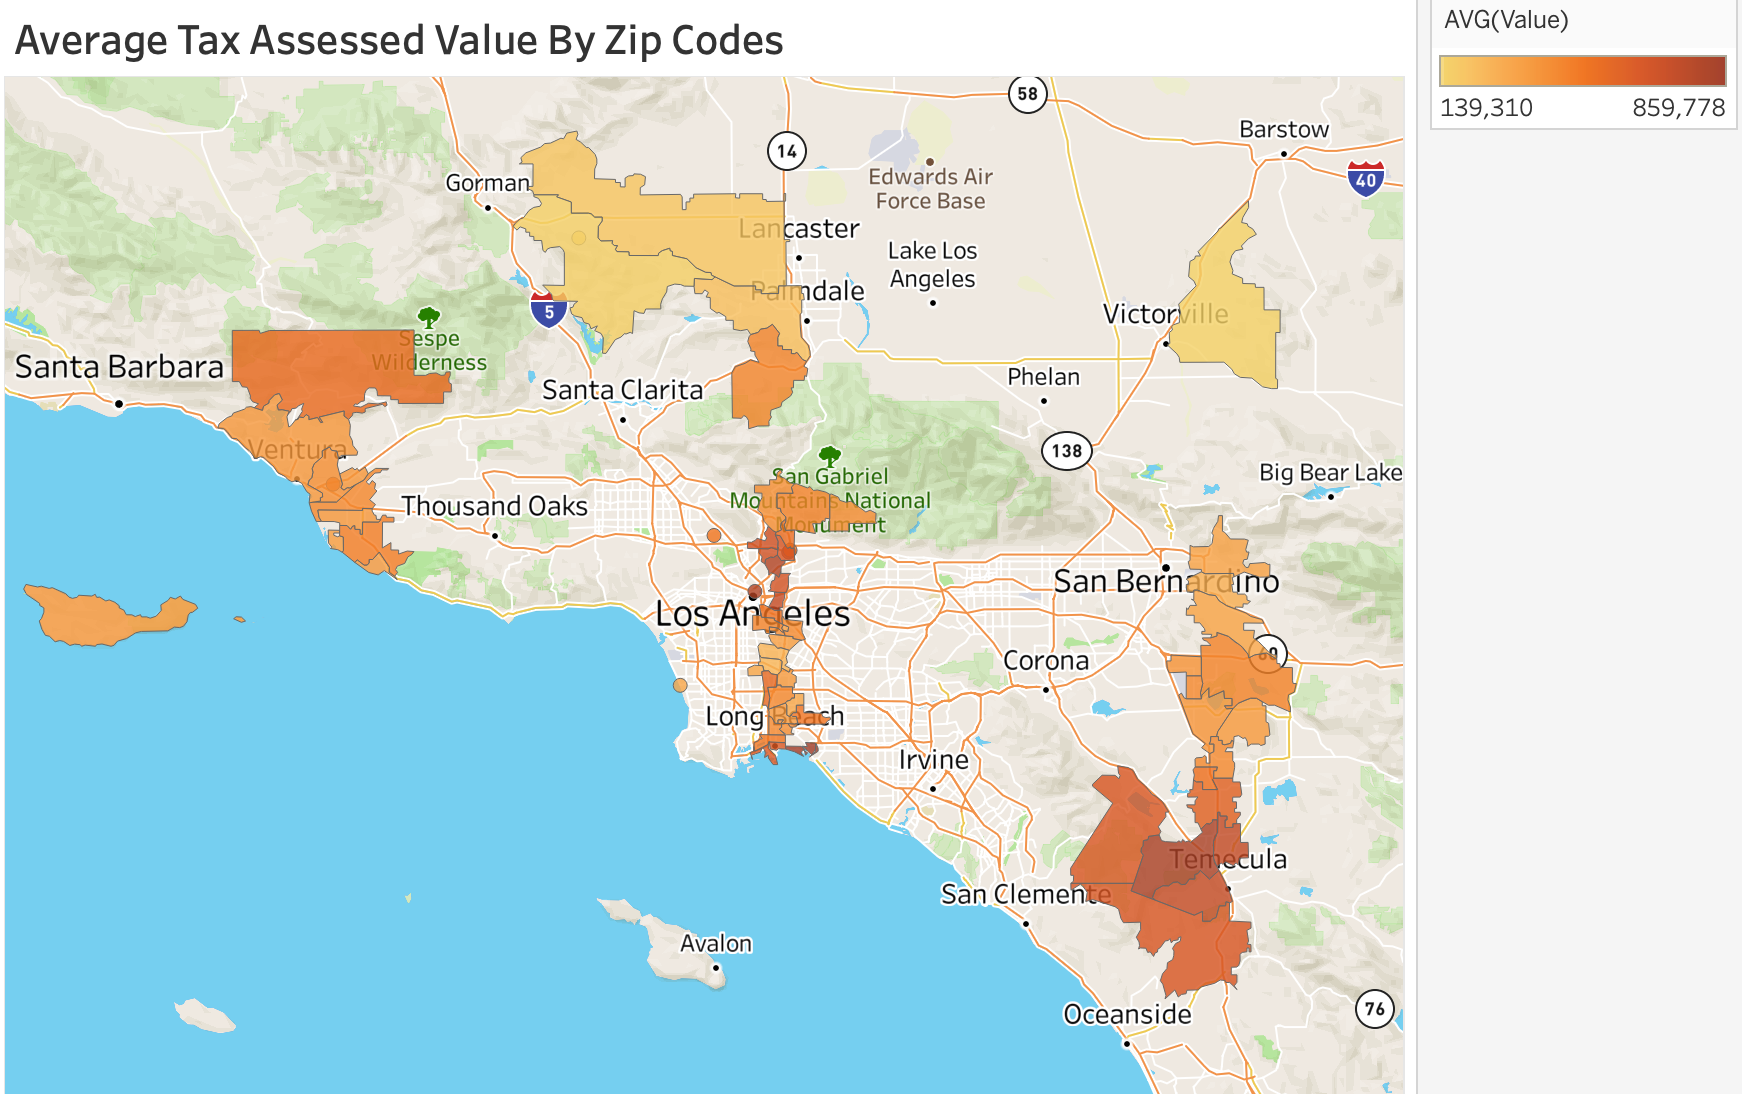

In [63]:
Image(filename='/Users/mindyshiben/Desktop/ZipValue.png')